In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, train_size=60000, random_state=123)
print("Train shape:", X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)


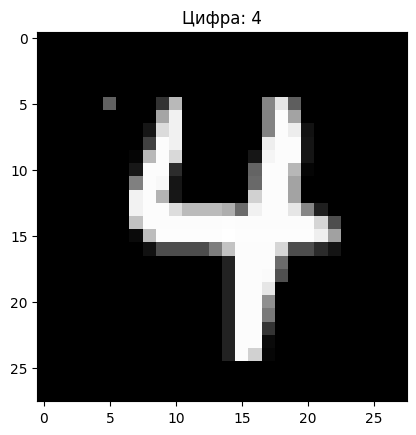

In [ ]:
plt.imshow(X_train[123], cmap='gray')
plt.title(f"Цифра: {y_train[123]}")
plt.show()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("X_train:", X_train.shape, "y_train:", y_train.shape)

X_train: (60000, 784) y_train: (60000, 10)


In [ ]:
model = Sequential()
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2366 - loss: 2.2570 - val_accuracy: 0.5243 - val_loss: 1.9944
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6443 - loss: 1.8193 - val_accuracy: 0.7127 - val_loss: 1.2676
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7557 - loss: 1.1245 - val_accuracy: 0.8003 - val_loss: 0.8397
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8131 - loss: 0.7761 - val_accuracy: 0.8368 - val_loss: 0.6488
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8440 - loss: 0.6130 - val_accuracy: 0.8542 - val_loss: 0.5478
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8677 - loss: 0.5154 - val_accuracy: 0.8707 - val_loss: 0.4832
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 0.4631 - val_accuracy: 0.8803 - val_loss: 0.4434
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8845 - los

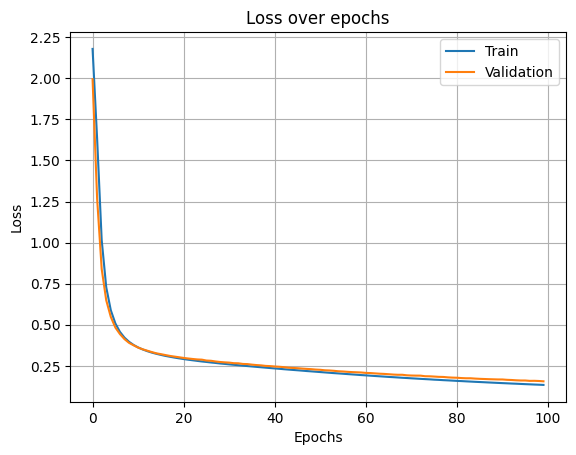

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.title('Loss over epochs')
plt.grid(True)
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1562
Test Loss: 0.15046533942222595
Test Accuracy: 0.9544000029563904


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


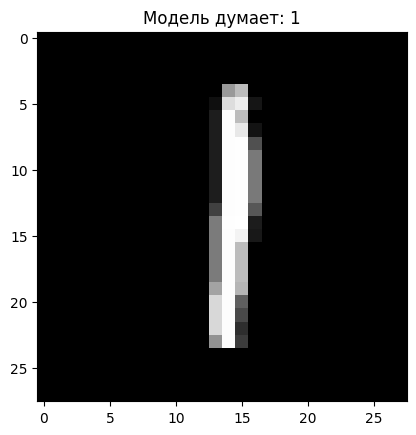

Реальный ответ: 1
Ответ сети: 1


In [ ]:
n = 123
result = model.predict(X_test[n:n+1])
plt.imshow(X_test[n].reshape(28, 28), cmap='gray')
plt.title(f"Модель думает: {np.argmax(result)}")
plt.show()
print("Реальный ответ:", np.argmax(y_test[n]))
print("Ответ сети:", np.argmax(result))

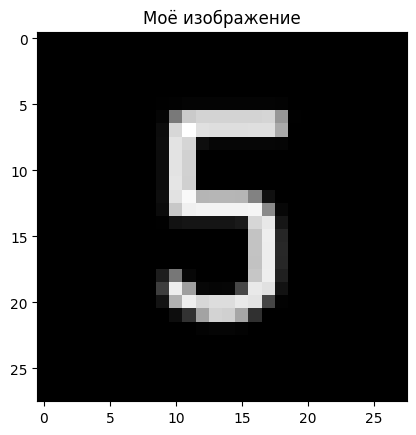

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Модель думает, что это: 5


In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение
file_data = Image.open('test.png')

# Преобразуем в оттенки серого
file_data = file_data.convert('L')

# Изменяем размер изображения до 28x28
file_data = file_data.resize((28, 28))

# Преобразуем изображение в массив numpy
test_img = np.array(file_data)

# Показываем изображение
plt.imshow(test_img, cmap='gray')
plt.title("Моё изображение")
plt.show()

# Нормализуем изображение
test_img = test_img / 255.0

# Ресайзим изображение в форму (1, 784) для подачи в модель
num_pixels = 28 * 28  # 28x28 изображение имеет 784 пикселя
test_img = test_img.reshape(1, num_pixels)

# Предсказание модели
result = model.predict(test_img)
print("Модель думает, что это:", np.argmax(result))
